# Random Forests

Random forest classifiers are an ensemble of decision trees, each giving their own classification. The decisions trees are constructed through in each step of the tree do a so called **split** which divides the data up into smaller sets using their characteristics. The decision made by the ensemble is determined by voting where the option with most votes from the trees wins. 

Advantages of the random forest model are
* Random decision forests correct for decision trees' habit of overfitting to their training set
* It can perform both regression and classification tasks
* A random forest produces good predictions that can be understood easily


Whereas disadvantages include
* A forest is less interpretable than a single decision tree
* Trained forest may require significant memory for storage, due to the need for retaining the information from several hundred individual trees

# Comment on parameters
The hyperparameters that are used in the model and are to be tuned to achieve accurate results are the following:
* **n_estimators** sets the number of trees used in the forest. A higher number increases the likelihood of the algorithm to converge, but does so at a loss of runtime. Tuning this parameter is thereby a tradeoff between accurracy and speed.
* **criterion** sets which criterion measure the quality of each split in the tree. *gini} is the default setting and uses the [Gini impurity](https://bambielli.com/til/2017-10-29-gini-impurity/) to desiding each split, while *entropy} uses the information gain to perform each split.
* **max_depth** sets the maximum depth of the tree, with default setting being to continue until all leaves contain fewer than min_samples_split. This hyperparamter can be tuned to potentially compensate for overfitting. The hyperparameter does also affect the runtime of the algorithm.
* **min_samples_split** indicates the lowest number of samples that are required to split a node in the tree. 
* **min_samples_leaf** is equivalent to the afformentioned parameter for split.
* **max_features** indicates the maximum number of features that are considered during each 
* **min_impurity_decrease** sets the minimum required impurity decrease for a node to be split. This is a difficult parameter to tune, but it can be used to combate potential problems arising from overfitting.
* **bootstrap** decides whether or not the samples for using the trees should be bootstrapped or not. The default setting is that they should, and was deemed to be the better option for this implementation to increase the reliability of the model.
* **n_jobs** sets the number of jobs that are being parallelized over the trees and run simulatneously. This can be tuned in order to increase the speed of the algorithm, with optimal setting varying depending on which computer the alogrithm is trained on.


There are furthermore a handfull of other hyperparameters, but they are often used only for niche applications and are thereby omitted in the description.


## Import the data

We're now ready to import the data. importData() imports the data from .csv-files and saves it into pandas dataFrames. It also performs a standardScaler, scaling the features one by one so their mean = 0 and std = 1.

In [1]:
# import the relevant package
from utils.import_data import importData
import utils.nicer_plots

In [2]:
# import the data
file_data = "data2.csv"
file_labels = "labels2.csv"
n_features = -1
directory = "/data/"

data, labels = importData(file_data, file_labels, directory, n_features)

Number of samples:    102400
Number of features:   3851


# Model Exploration

In [4]:
%load_ext autoreload
%autoreload 2
from sklearn.ensemble import RandomForestClassifier
from utils.model_tester import ModelTester

In [7]:
# initialize the model
mt = ModelTester(data, labels, RandomForestClassifier, n_estimators = 100)
print(mt.model(**mt.parameters))

RandomForestClassifier()


In [ ]:
sampling = 'under' # can be 'under', 'over' or nothing
mt.training_loop(sampling = sampling, printing = False)

In [10]:
mt.print_essentials()

Results: 

variable                             average    std  95.0% PI           min     max
---------------------------------  ---------  -----  ---------------  -----  ------
weighted accuracy [%]                  50.03   0.14  (49.93, 50.13)   49.86   50.44
duration [s]                          115.54  28.64  (95.05, 136.03)  51.26  164.02
infeasible_percentage [%]              82.56   2.4   (80.85, 84.28)   77.25   85.45
infeasible_guessed_percentage [%]      98.08   5.1   (94.43, 101.73)  82.86  100
feasible_recall [%]                     1.96   5.3   (-1.83, 5.76)     0      17.81
feasible_precision [%]                  5.72   9.03  (-0.74, 12.17)    0      23.65
infeasible_recall [%]                  98.1    5.04  (94.49, 101.7)   83.06  100
infeasible_precision [%]               82.58   2.36  (80.89, 84.26)   77.43   85.45
auc of roc                              0.5    0.02  (0.49, 0.52)      0.49    0.55


We can see here from the results that the algorithm on average performs results that are relatively low/bad due to the accurracy creeping down towards ~50%. The algorithm guesses a substantial amount of infeasible, which results in it not managing to identify the points which are feasible to any good extent.

Weighted accuracies:


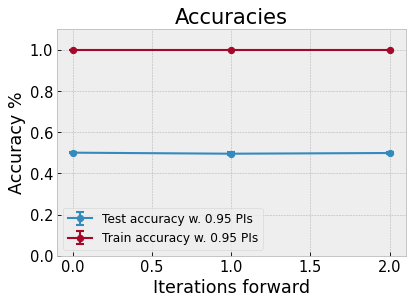

Test accuracies: [0.50029724 0.49527249 0.49869681]
Confusion matrices:


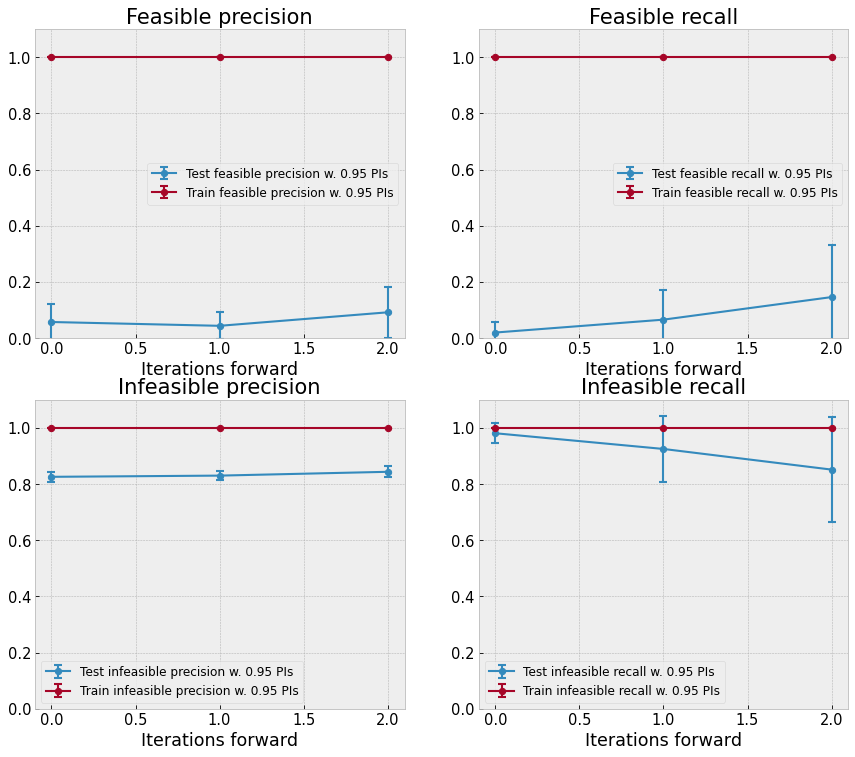

Percentage infeasible on test and train data:


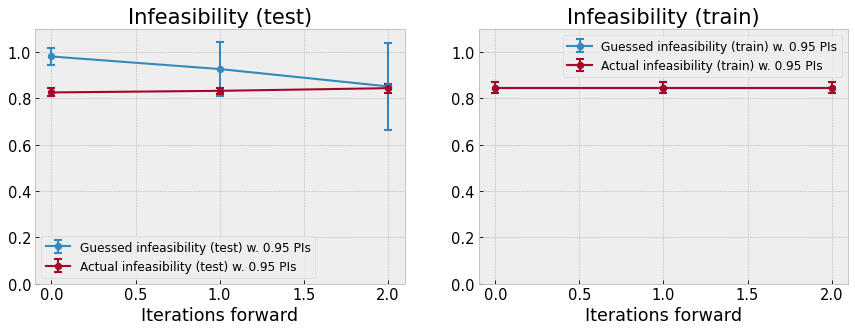

AUC:


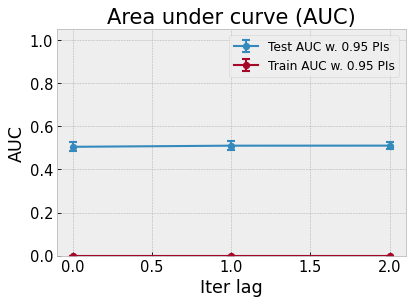

In [11]:
# plotting the results
mt.plot_graphs()

The results show the same tendency as the other algorithms previously explored, to overfit the training data. This results in a very poor performance on later iterations.

## Hyperparameter tuning

In [12]:
# code, lägg in max features
hp = {'n_estimators':[20, 50, 100, 200, 500],
      'criterion':['gini', 'entropy'],
      'max_features': ['auto', 'sqrt', 'log2']
        }

mt.hyperparameter_tuning(n_train = 8, n_test = 2, n_epochs = 3, update_parameters = True, sampling = 'under', **hp)

100%|██████████| 30/30 [2:03:03<00:00, 246.10s/it]


   Ranking    n_estimators  criterion    max_features      balanced_accuracy    Standard deviation
---------  --------------  -----------  --------------  -------------------  --------------------
        1              50  gini         sqrt                       0.509019           0.0120416
        2             100  gini         auto                       0.506272           0.00820936
        3              20  gini         sqrt                       0.505464           0.00485308
        4             200  gini         auto                       0.503727           0.00527028
        5             100  gini         log2                       0.501908           0.00269781
        6              20  gini         auto                       0.501424           0.00334871
        7             200  gini         log2                       0.501259           0.00178021
        8             500  gini         auto                       0.501184           0.0016747
        9             100  e

{'n_estimators': 50, 'criterion': 'gini', 'max_features': 'sqrt'}

# Results after tuning

In [ ]:
# re-train
sampling = 'under' # can be 'under', 'over' or nothing

# run the training loop
mt.training_loop(sampling = sampling, printing = False)

In [15]:
mt.print_essentials()

Results: 

variable                             average    std  95.0% PI           min     max
---------------------------------  ---------  -----  ---------------  -----  ------
weighted accuracy [%]                  50.17   0.58  (49.75, 50.58)   49.73   51.89
duration [s]                           59.16  14.83  (48.55, 69.77)   26.9    86.73
infeasible_percentage [%]              82.56   2.4   (80.85, 84.28)   77.25   85.45
infeasible_guessed_percentage [%]      97.29   6.28  (92.81, 101.78)  79.1   100
feasible_recall [%]                     2.96   7.11  (-2.12, 8.05)     0      23.82
feasible_precision [%]                 15.84  29.49  (-5.26, 36.94)    0     100
infeasible_recall [%]                  97.37   6.03  (93.06, 101.69)  79.96  100
infeasible_precision [%]               82.64   2.22  (81.06, 84.23)   78.09   85.45
auc of roc                              0.51   0.03  (0.49, 0.53)      0.47    0.54


Weighted accuracies:


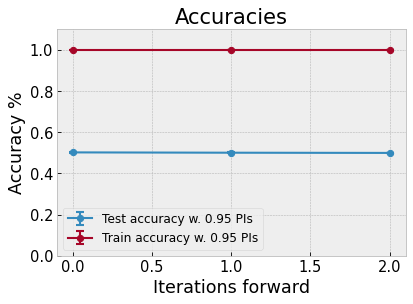

Test accuracies: [0.50168148 0.50011304 0.49910421]
Confusion matrices:


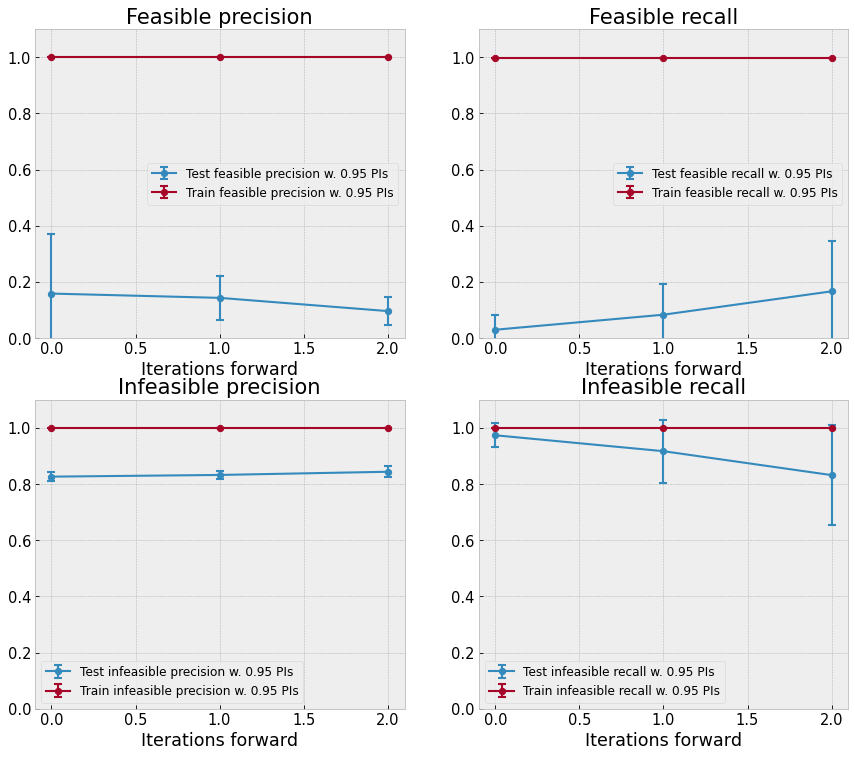

Percentage infeasible on test and train data:


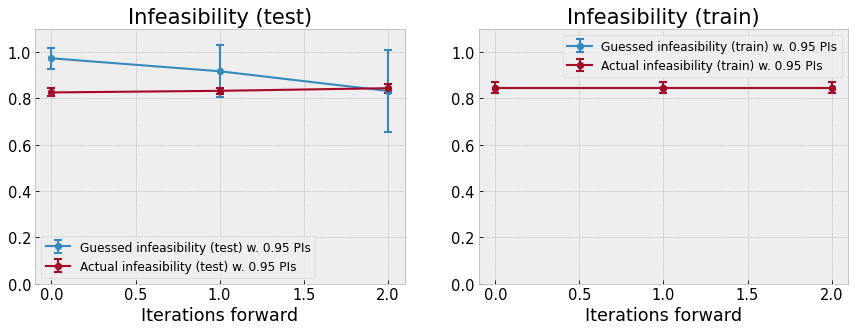

AUC:


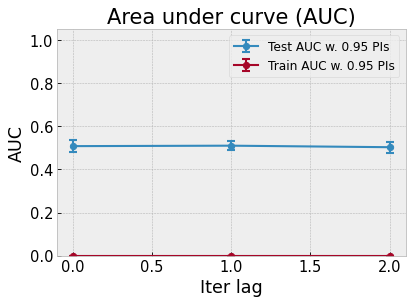

In [16]:
mt.plot_graphs()

# Conclusions
The algorithm does not manage to find any pattern, in similar fashion to previously tried algortihms. The prediction interval is located on both sides of 50% mark, which indicates that it is almost prefereable just to guess results randonmly. Furthermore, Random Forest becomes relatively slow as the number of trees in the forest grows which makes it difficult to implement it even if it would show promising results. 